In [1]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from poseutils.props import calculate_limb_lengths
from poseutils.props import get_angles_from_joints
from poseutils.props import get_joints_from_angles
from poseutils.props import get_body_centered_axes
from poseutils.transform import normalize_torso_2d
from poseutils.transform import normalize_skeleton
from poseutils.view import draw_skeleton
from poseutils.view import draw_axes
from poseutils.view import draw_bounding_box
from poseutils.constants import adjacency_list
from poseutils.constants import dataset_indices
from poseutils.props import get_bounding_box_2d
from poseutils.transform import scale_bounding_area_to
from poseutils.datasets.unprocessed.H36MDataset import H36MDataset
from poseutils.datasets.unprocessed.GPADataset import GPADataset
from poseutils.datasets.unprocessed.TDPWDataset import TDPWDataset
from poseutils.datasets.unprocessed.SURREALDataset import SURREALDataset
from poseutils.datasets.unprocessed.MPI3DHPDataset import MPI3DHPDataset

In [2]:
print(adjacency_list(14))

[[1, 4, 7], [2], [3], [], [5], [6], [], [8, 11], [9], [10], [], [12], [13], []]


In [3]:
indices_to_select, _ = dataset_indices("h36m", 14)
dpath = "/home/saad/Personal/Research/Dataset/CrossDataset/h36m"
dataset = H36MDataset(dpath)
data_3d = dataset.get_3d_train()
data_2d = dataset.get_2d_train()

[PoseUtils] Loaded raw data


In [4]:
dpath = "/home/saad/Personal/Research/Dataset/CrossDataset/gpa_xyz.npz"
dataset = GPADataset(dpath)
data_3d = dataset.get_3d_train()
data_2d = dataset.get_2d_train()

[PoseUtils] Loaded raw data


In [10]:
dpath1 = "/home/saad/Personal/Research/Dataset/CrossDataset/surreal_train_compiled.npz"
dpath2 = "/home/saad/Personal/Research/Dataset/CrossDataset/surreal_val_compiled.npz"
dataset = SURREALDataset(dpath1, dpath2)
data_3d = dataset.get_3d_train()
data_2d = dataset.get_2d_train()

[PoseUtils] Loaded raw data


In [19]:
dpath = "/home/saad/Personal/Research/Dataset/CrossDataset/mpii_compiled.npz"
dataset = MPI3DHPDataset(dpath)
data_3d = dataset.get_3d_train()
data_2d = dataset.get_2d_train()

[PoseUtils] Loaded raw data


In [24]:
dpath = "/home/saad/Personal/Research/Dataset/CrossDataset/3dpw_wo_invalid.npz"
dataset = TDPWDataset(dpath)
data_3d = dataset.get_3d_train()
data_2d = dataset.get_2d_train()

[PoseUtils] Loaded raw data


In [25]:
lx, ly, rx, ry = get_bounding_box_2d(data_2d)

In [26]:
stacked_bbox = np.vstack((lx, ly, rx, ry)).T

print(stacked_bbox.shape)

(22735, 4)


In [27]:
scaled_data_2d = scale_bounding_area_to(data_2d, stacked_bbox)

In [8]:
print(scaled_data_2d.shape)

(222514, 14, 2)


<IPython.core.display.Javascript object>


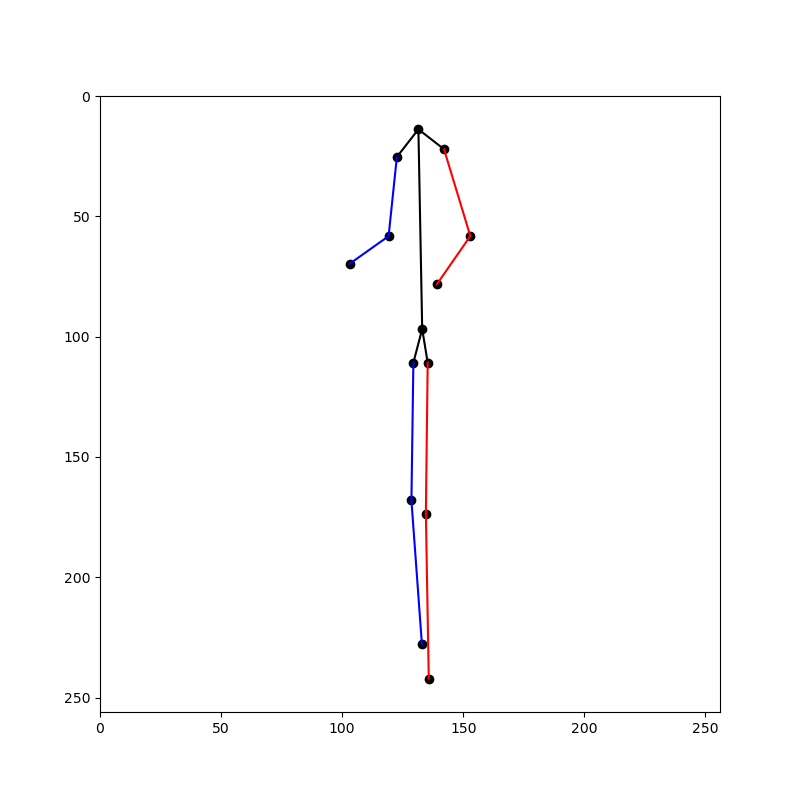

In [28]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
draw_skeleton(scaled_data_2d[800, :, :], ax)
# draw_bounding_box(stacked_bbox[100, 0], stacked_bbox[100, 1], stacked_bbox[100, 2], stacked_bbox[100, 3], ax)
ax.set_xlim((0, 256))
ax.set_ylim((256, 0))
plt.show()

In [4]:
data_2d_norm = normalize_skeleton(data_2d)

In [5]:
print(data_2d_norm[100, :, :])

[[ 0.          0.        ]
 [ 0.03913257  0.17682227]
 [ 0.03566066  0.90454702]
 [ 0.12171239  1.69249822]
 [-0.08850279  0.17896069]
 [-0.33063106  0.91362784]
 [-0.28042277  1.72619007]
 [-0.12028728 -0.99273913]
 [-0.37235241 -0.88095757]
 [-0.48888508 -0.33469087]
 [-0.95280765 -0.17158562]
 [ 0.07670378 -0.83333782]
 [ 0.20353879 -0.33914198]
 [-0.15092695 -0.18464231]]


<IPython.core.display.Javascript object>


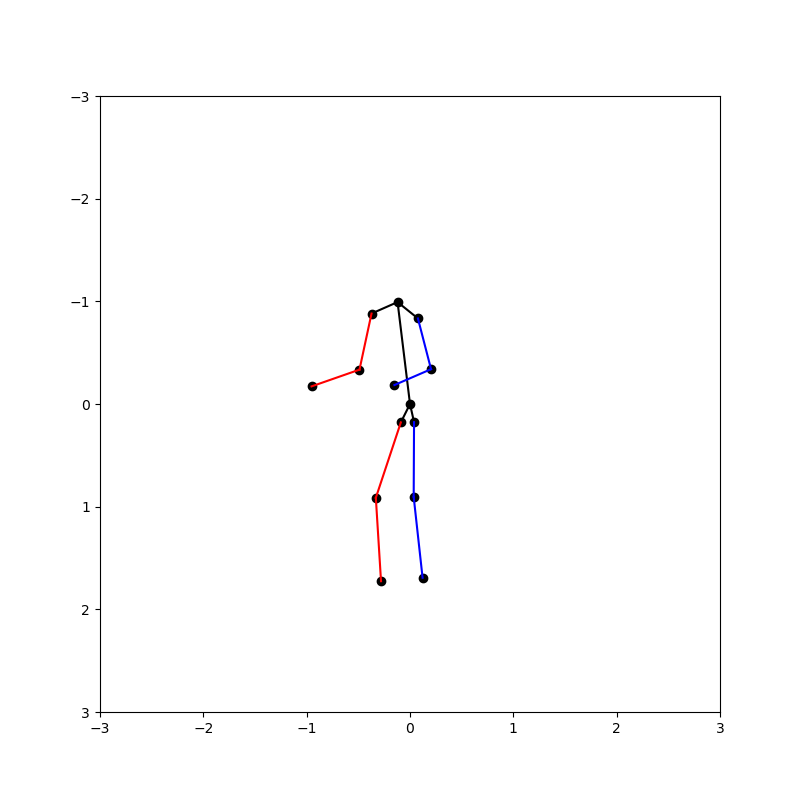

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
draw_skeleton(data_2d_norm[100, :, :], ax)
ax.set_xlim((-3, 3))
ax.set_ylim((3, -3))
plt.show()

In [4]:
up, fwd, right, axes = get_body_centered_axes(data_3d)

In [5]:
angles_3d, _ = get_angles_from_joints(data_3d[0, :, :])
limb_length = calculate_limb_lengths(data_3d[0, :, :])
joints_3d = get_joints_from_angles(angles_3d, limb_length)

In [6]:
up = (data_3d[:, 8, :] + data_3d[:, 11, :]) / 2. - data_3d[:, 0, :]
up = up / np.linalg.norm(up, axis=1).reshape(-1, 1)
print(up[0, :])

[ 0.0119176  -0.99542706 -0.0947784 ]


<IPython.core.display.Javascript object>


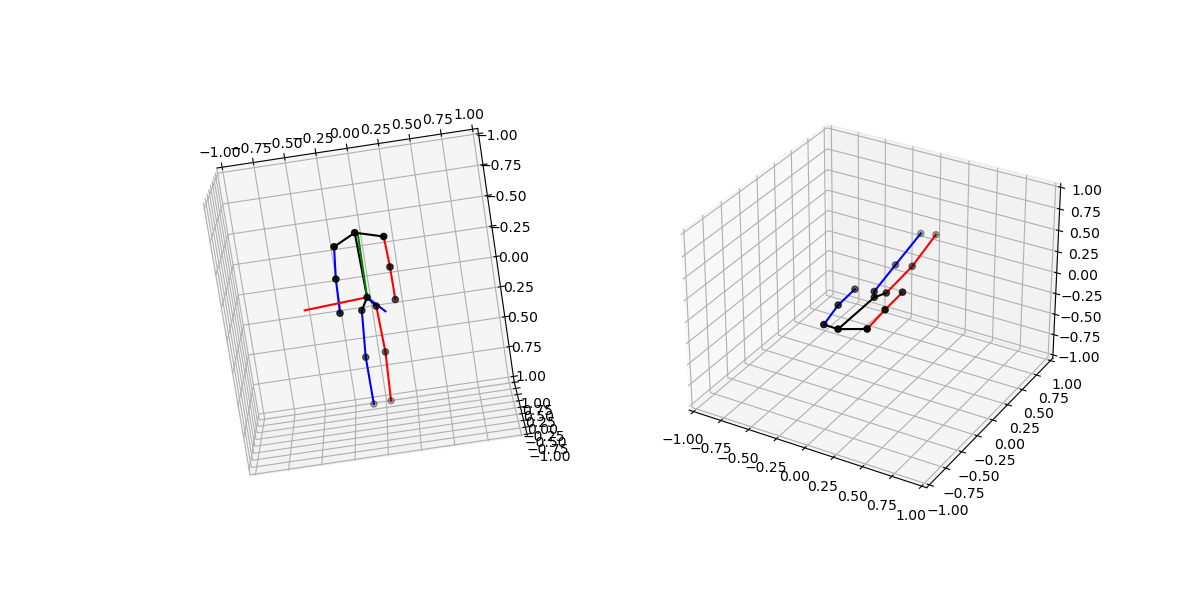

In [7]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d', xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))
bx = fig.add_subplot(122, projection='3d', xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))

draw_skeleton(data_3d[0, :, :] - data_3d[0, 0, :], ax)
draw_axes(axes[0, :, :], np.zeros(3), ax)
draw_skeleton(joints_3d, bx)

plt.show()

In [7]:
torso_2d, widths, names = normalize_torso_2d(data_2d[:, [1, 4, 8, 11], :])

In [8]:
print(torso_2d[0, :, :])

[[ 0.          0.        ]
 [ 0.18902808 -0.01988646]
 [ 0.41984284 -0.90759682]
 [-0.22580051 -0.92637775]]


In [10]:
for i in range(3):
    print(f"{names[i]} : {np.mean(widths[i, :])}")

RH -> LH : 50.604333005745715
RH -> LS : 310.96999657317303
RH -> RS : 296.11366209898


In [8]:
indices_to_select, indices_to_sort = dataset_indices("gpa", 14)
dpath = "/home/saad/Personal/Research/Dataset/CrossDataset/gpa_xyz.npz"
data = np.load(dpath, allow_pickle=True, encoding='latin1')['data'].item()
data_3d = data['train']['3d'][:, indices_to_select, :][:, indices_to_sort, :]/1000
data_2d = data['train']['2d'][:, indices_to_select, :][:, indices_to_sort, :]

<IPython.core.display.Javascript object>


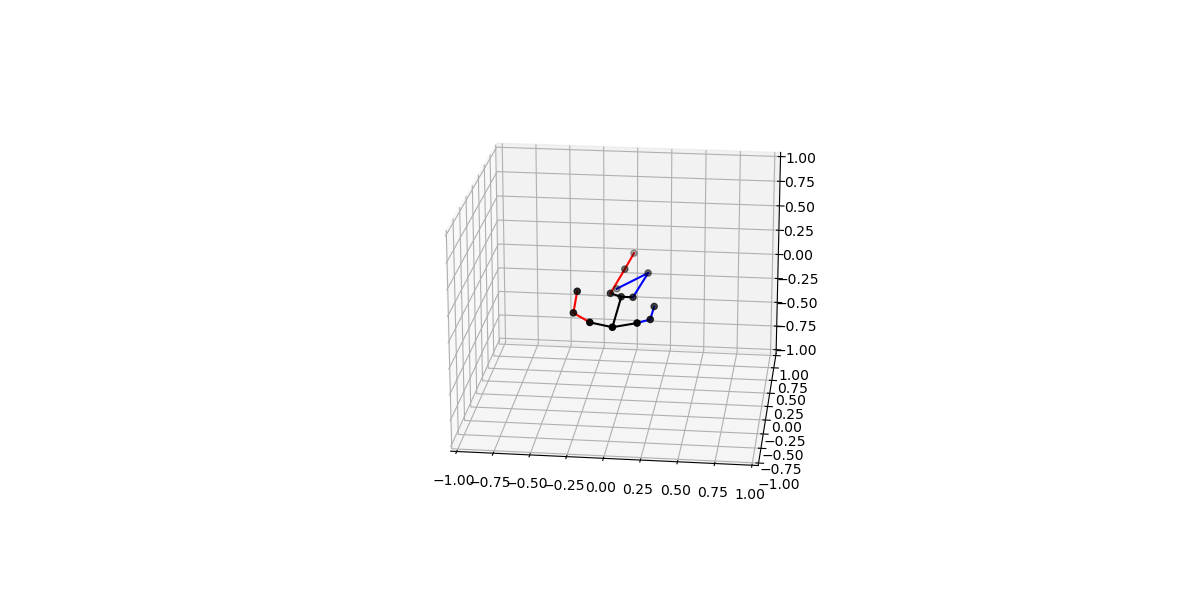

In [10]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d', xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))

draw_skeleton(data_3d[500, :, :] - data_3d[500, 0, :], ax)

plt.show()